# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

## Loading Dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_csv("data/diabetes.csv")

In [3]:
raw_df.shape

(768, 9)

In [4]:
raw_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The dataset have 768 rows and 9 columns

## Null Values

In [5]:
# Checking for null values
raw_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The dataset have no null values

## Zero Values

In [285]:
#Glucose rows with 0 value
print("Glucose Shape:", raw_df[raw_df["Glucose"] == 0].shape)

#Indexes of glucose rows with 0 value
zero_glucose_indexes = raw_df[raw_df["Glucose"] == 0].index

# raw_df[raw_df["Glucose"] == 0].head()

Glucose Shape: (5, 9)


In [286]:
#Blood Pressure rows with 0 value
print("Blood Pressure Shape:", raw_df[raw_df["BloodPressure"] == 0].shape)

#Indexes of blood pressure rows with 0 value
zero_bp_indexes = raw_df[raw_df["BloodPressure"] == 0].index

# raw_df[raw_df["BloodPressure"] == 0].head()

Blood Pressure Shape: (35, 9)


In [287]:
#Skin Thickness rows with 0 value
print("Skin Thickness Shape:", raw_df[raw_df["SkinThickness"] == 0].shape)

#Indexes of Skin Thickness rows with 0 value
zero_skin_index = raw_df[raw_df["SkinThickness"] == 0].index

# raw_df[raw_df["SkinThickness"] == 0].head()

Skin Thickness Shape: (227, 9)


In [288]:
#Skin Insulin rows with 0 value
print("Insulin Shape:", raw_df[raw_df["Insulin"] == 0].shape)

#Indexes of Skin Thickness rows with 0 value
zero_insulin_index = raw_df[raw_df["Insulin"] == 0].index

# raw_df[raw_df["Insulin"] == 0].head()

Insulin Shape: (374, 9)


In [291]:
#BMI Insulin rows with 0 value
print("BMI Shape:", raw_df[raw_df["BMI"] == 0].shape)

#Indexes of Skin Thickness rows with 0 value
zero_insulin_index = raw_df[raw_df["BMI"] == 0].index

# raw_df[raw_df["BMI"] == 0].head()

BMI Shape: (11, 9)


There are significant number of rows which have zero values in both Skin Thickness and Insulin features. This findings should be considered when creating a model.

On the other hand, Glucose, Blood Pressure and BMI features have a small number of rows with zero values with may not affect the model, but will still consider later.

## Grouping Dataset by Outcome

In [58]:
raw_df_outcomeTrue = raw_df[raw_df["Outcome"] == 1]
raw_df_outcomeFalse = raw_df[raw_df["Outcome"] == 0]

In [59]:
raw_df_outcomeTrue.shape

(268, 9)

In [60]:
raw_df_outcomeFalse.shape

(500, 9)

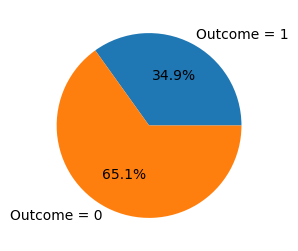

In [66]:
plt.figure(figsize=(3,3))
plt.pie((raw_df_outcomeTrue.shape[0], raw_df_outcomeFalse.shape[0]), 
        labels=("Outcome = 1", "Outcome = 0"),
       autopct='%1.1f%%')
plt.show()

About one-third of the data is composed of instances where the diabetic outcome is equal to 1.

## Summary Statistics and Histograms of All Data

In [310]:
plot_title = ["Pregnancy", "Glucose", "Blood Pressure", 
              "Skin Thickness", "Insulin", "BMI", 
              "Diabetes Pedigree Function", "Age", "Outcome"]
data_columns = raw_df.columns

bin_width = int(np.sqrt(len(raw_df)))

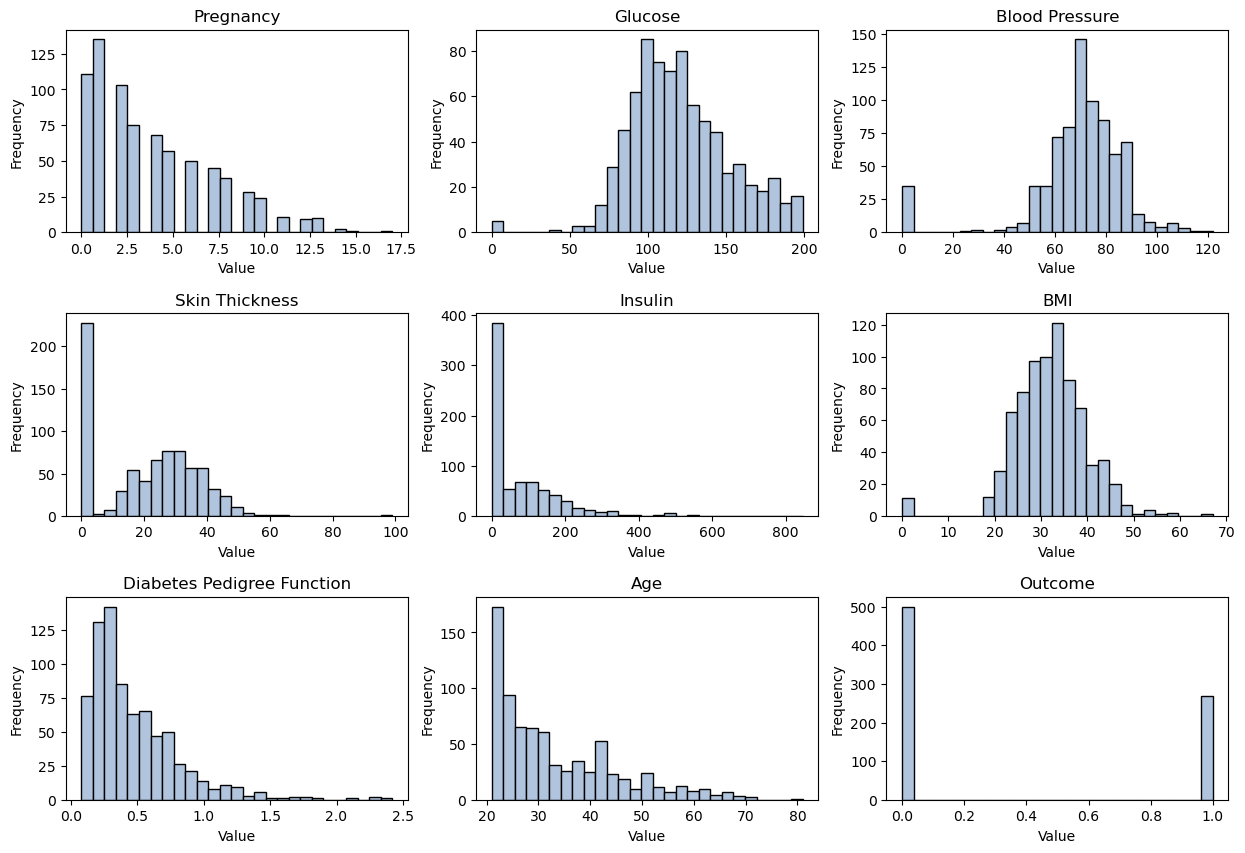

In [311]:
# Create dataset's histograms
plt.figure(figsize=(15, 10))

for i in range(len(plot_title)):
    plt.subplot(3, 3, i+1)  
    plt.subplots_adjust(hspace=0.4)
    plt.hist(raw_df[data_columns[i]], bins=bin_width, color='lightsteelblue', edgecolor='k')
    plt.title(plot_title[i])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.show()

#### Shape of Data (All Data)
1. Skewed to the Left - None of the features have a left skewed distribution shape.
    - None
    
    
2. Skewed to the right - The following features are skewed to the right
    - Pregnancy
    - Insulin
    - Skin Thickness
    - Diabetes Pregnancy Function
    - Age
    
    
3. Normal Distribution - The following features are somewhat normally distributed
    - Glucose
    - Blood Pressure
    - BMI
    
    
4. Outliers - The following features have some outliers in the zero-value point which signifies an absence of data upon the collection of the data instance.
    - Pregnancy
    - Skin Thickness
    - Insulin
    - Blood Pressure

## Summary Statistics and Histograms of Data with Outcome = 1

In [62]:
bin_width = int(np.sqrt(len(raw_df_outcomeTrue)))

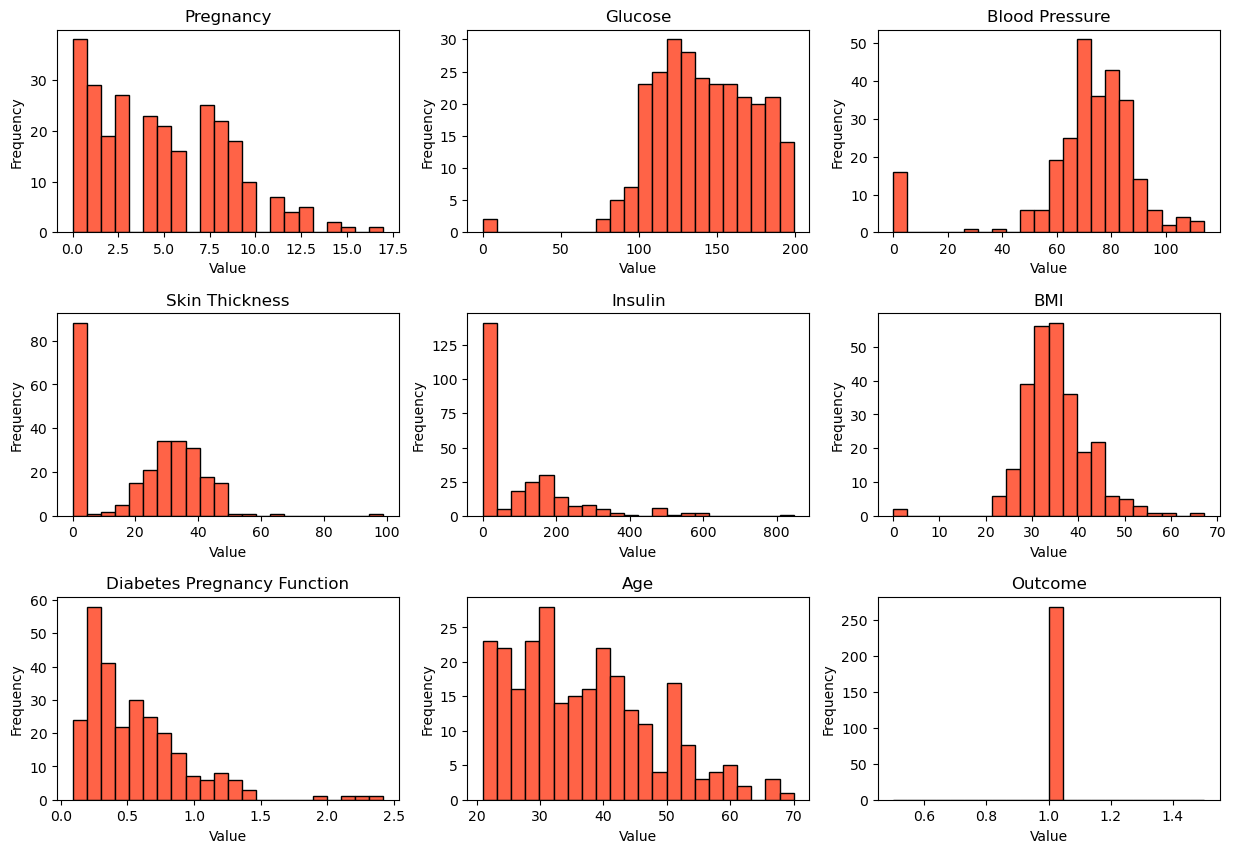

In [68]:
# Create dataset's histograms
plt.figure(figsize=(15, 10))

for i in range(len(plot_title)):
    plt.subplot(3, 3, i+1)  
    plt.subplots_adjust(hspace=0.4)
    plt.hist(raw_df_outcomeTrue[data_columns[i]], bins=bin_width, color='tomato', edgecolor='k')
    plt.title(plot_title[i])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.show()

#### Shape of Data (All Data)
1. Skewed to the Left - The following features are somewhat skewed to the left and the shape is somewhat affected by the outliers.
    - Glucose
    - Blood Pressure
    
    
2. Skewed to the right - The following features are skewed to the right
    - Pregnancy
    - Insulin
    - Skin Thickness
    - Diabetes Pregnancy Function
    - Age
    
    
3. Normal Distribution - The following features are somewhat normally distributed
    - BMI
    
    
4. Outliers - The following features have some outliers in the zero-value point which signifies an absence of data upon the collection of the data instance.
    - Pregnancy
    - Skin Thickness
    - Insulin
    - Blood Pressure

## Summary Statistics and Histograms of Data with Outcome = 0

In [64]:
bin_width = int(np.sqrt(len(raw_df_outcomeFalse)))

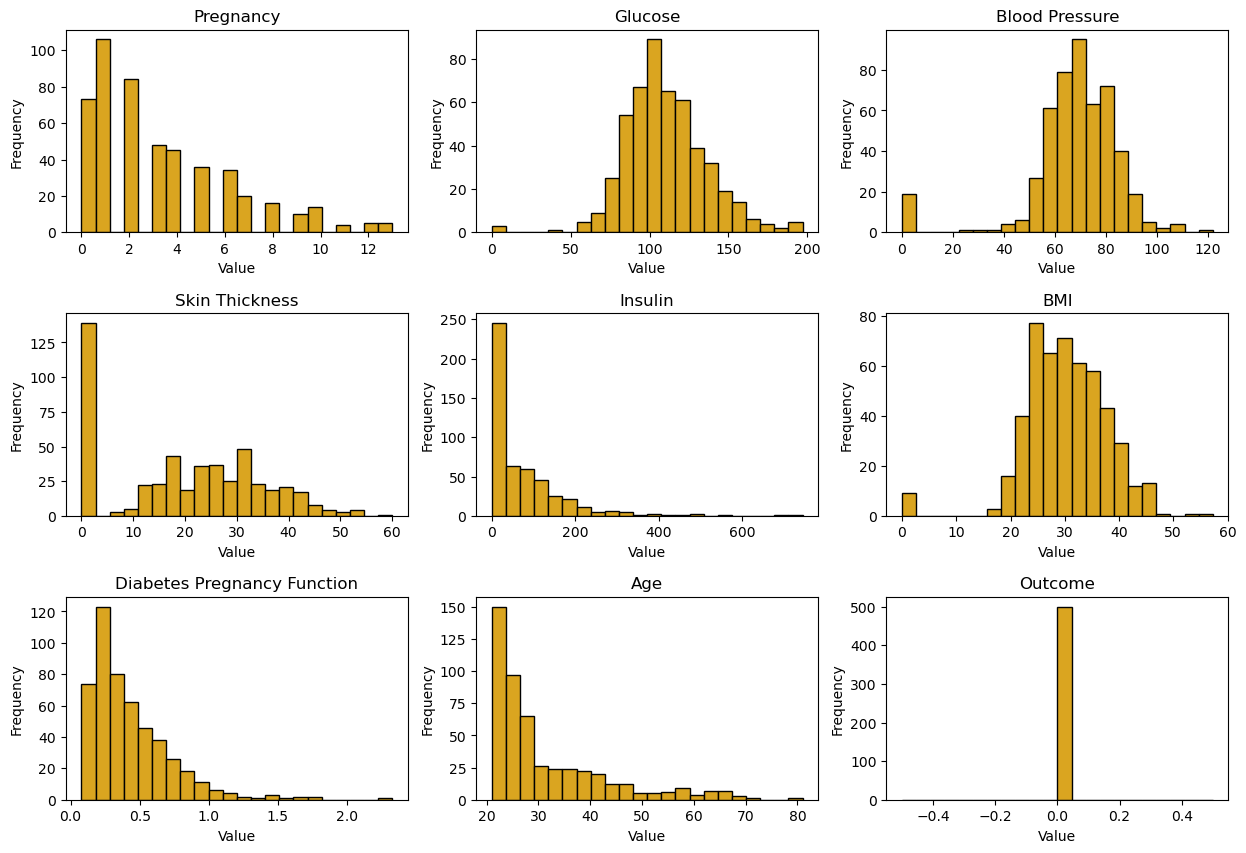

In [157]:
# Create dataset's histograms
plt.figure(figsize=(15, 10))

for i in range(len(plot_title)):
    plt.subplot(3, 3, i+1)  
    plt.subplots_adjust(hspace=0.4)
    plt.hist(raw_df_outcomeFalse[data_columns[i]], bins=bin_width, color='goldenrod', edgecolor='k')
    plt.title(plot_title[i])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.show()

#### Shape of Data (All Data)
1. Skewed to the Left - The following features are somewhat skewed to the left and the shape is somewhat affected by the outliers.
    - Glucose
    - Blood Pressure
    
    
2. Skewed to the right - The following features are skewed to the right
    - Pregnancy
    - Insulin
    - Skin Thickness
    - Diabetes Pregnancy Function
    - Age
    
    
3. Normal Distribution - The following features are somewhat normally distributed
    - BMI
    
    
4. Outliers - The following features have some outliers in the zero-value point which signifies an absence of data upon the collection of the data instance.
    - Pregnancy
    - Skin Thickness
    - Insulin
    - Blood Pressure

## Summary Statistics of All Data Instances

In [132]:
#Summary Statistics of All Data
sum_stat_all = pd.DataFrame(raw_df.describe())
sum_stat_all

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Summary Statistics of Instances where Outcome = 1

In [133]:
#Summary Statistics of All Data
sum_stat_outcomeTrue = pd.DataFrame(raw_df_outcomeTrue.describe())
sum_stat_outcomeTrue

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


## Summary Statistics of Instances where Outcome = 0

In [141]:
#Summary Statistics of All Data
sum_stat_outcomeFalse = pd.DataFrame(raw_df_outcomeFalse.describe())
sum_stat_outcomeFalse

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


## Visualizing Summary Statistics

In [240]:
#Means of the dataset
columns = raw_df.columns
mean_all = list(sum_stat_all.loc["mean"])
mean_outcomeTrue = list(sum_stat_outco/////meTrue.loc["mean"])
mean_outcomeFalse = list(sum_stat_outcomeFalse.loc["mean"])

#References
# raw_data
# raw_data_outcomeTrue
# raw_data_outcomeFalse
# plot_title

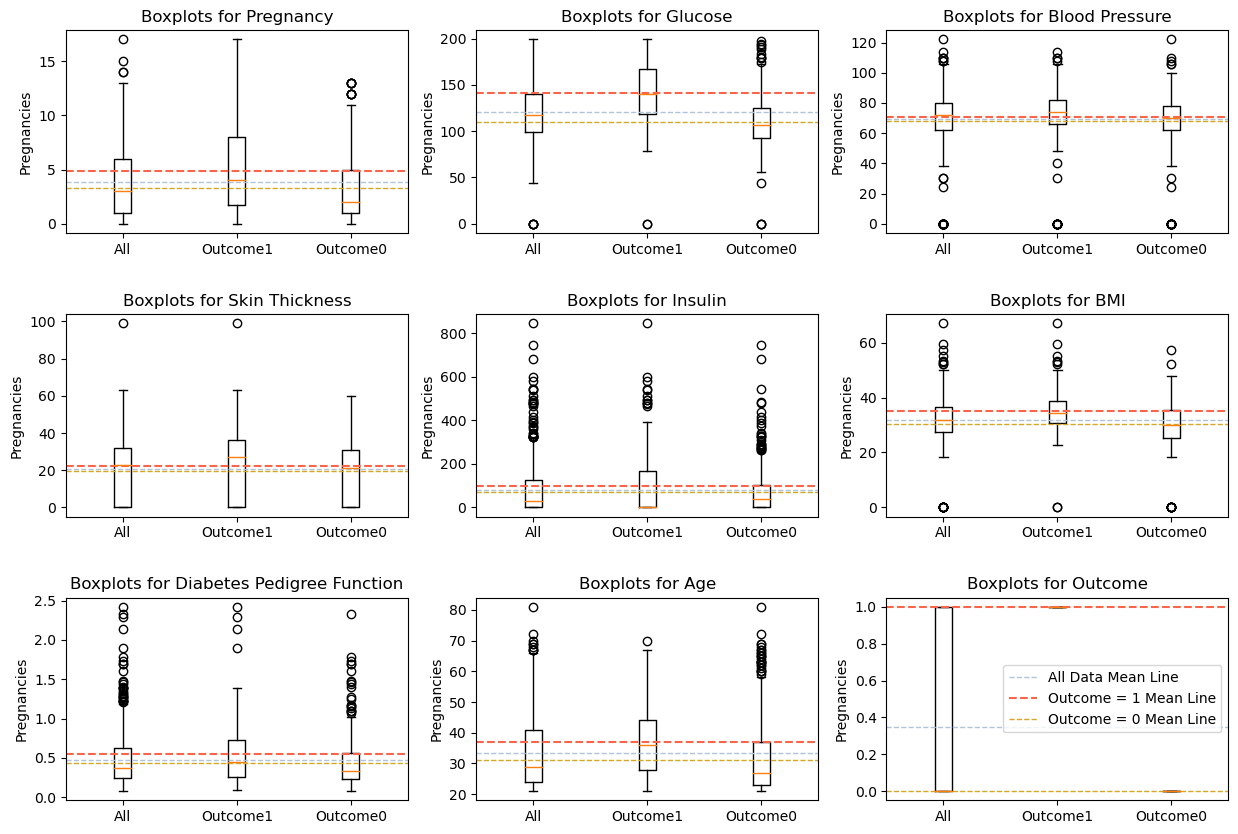

/var/folders/x6/m1pn8n_x0_77zgh2x7003htc0000gn/T/ipykernel_33902/1526752303.py:26: RuntimeWarning: divide by zero encountered in true_divide
  means = pd.DataFrame((mean_all, mean_outcomeTrue, mean_outcomeFalse, (np.array(mean_outcomeTrue)/np.array(mean_outcomeFalse))))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
All,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
Outcome1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.000000
Outcome0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.000000
Outcome1:Outcome0,1.475340,1.284392,1.038728,1.127145,1.458539,1.159659,1.281025,1.188431,inf


In [318]:
# Create Boxplots
plt.figure(figsize=(15, 10))

for i in range(len(plot_title)):
    #Plot Layout
    plt.subplot(3, 3, i+1)  
    plt.subplots_adjust(hspace=0.4)
    
    #Boxplots
    plt.boxplot(raw_df[columns[i]], positions=[1], labels=["All"])
    plt.boxplot(raw_df_outcomeTrue[columns[i]], positions=[2], labels=["Outcome1"])
    plt.boxplot(raw_df_outcomeFalse[columns[i]], positions=[3], labels=["Outcome0"])

    # Mean lines
    plt.axhline((mean_all[i]), color='lightsteelblue', linestyle='dashed', linewidth=1, label='All Data Mean Line')
    plt.axhline((mean_outcomeTrue[i]), color='tomato', linestyle='dashed', linewidth=1.5, label='Outcome = 1 Mean Line')
    plt.axhline((mean_outcomeFalse[i]), color='goldenrod', linestyle='dashed', linewidth=1, label='Outcome = 0 Mean Line')
    
    #Labels
    plt.ylabel('Pregnancies')
    plt.title('Boxplots for ' + plot_title[i])
plt.legend()
plt.show()

#Mean of all Features
means = pd.DataFrame((mean_all, mean_outcomeTrue, mean_outcomeFalse, (np.array(mean_outcomeTrue)/np.array(mean_outcomeFalse))))
means.columns = columns
means = means.set_index(pd.Index(["All", "Outcome1", "Outcome0", "Outcome1:Outcome0"]))
means

Based on the boxplots and the dataframe above, it is clear that all instances in the dataset where Outcome = 1 have a higher mean compared to the means of all data set and the instances where Outcome = 0.



# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

## Replacing Zero Values with the Mean of the Column

Blood Pressure and Skin Thickness are features that are most likely does not have a zero value. The zero values will be replaced by the mean of which group (Outcome = 1 or Outcome = 0) the zero value belongs.

Pregnancies on the other hand can have zero values as not all individuals can get or have been pregnant.

In [500]:
df = raw_df.copy()

In [501]:
for instance in range(len(df["Outcome"])):
    if(df["BloodPressure"][instance] == 0):
        if(df["Outcome"][instance] == 0):
            df["BloodPressure"][instance] = means["BloodPressure"][2]
        elif(df["Outcome"][instance] == 1):
            df["BloodPressure"][instance] = means["BloodPressure"][1]
    elif(df["SkinThickness"][instance] == 0):
        if(df["Outcome"][instance] == 0):
            df["SkinThickness"][instance] = means["SkinThickness"][2]
        elif(df["Outcome"][instance] == 1):
            df["SkinThickness"][instance] = means["SkinThickness"][1]

/var/folders/x6/m1pn8n_x0_77zgh2x7003htc0000gn/T/ipykernel_33902/2062941160.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SkinThickness"][instance] = means["SkinThickness"][1]
/var/folders/x6/m1pn8n_x0_77zgh2x7003htc0000gn/T/ipykernel_33902/2062941160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BloodPressure"][instance] = means["BloodPressure"][2]


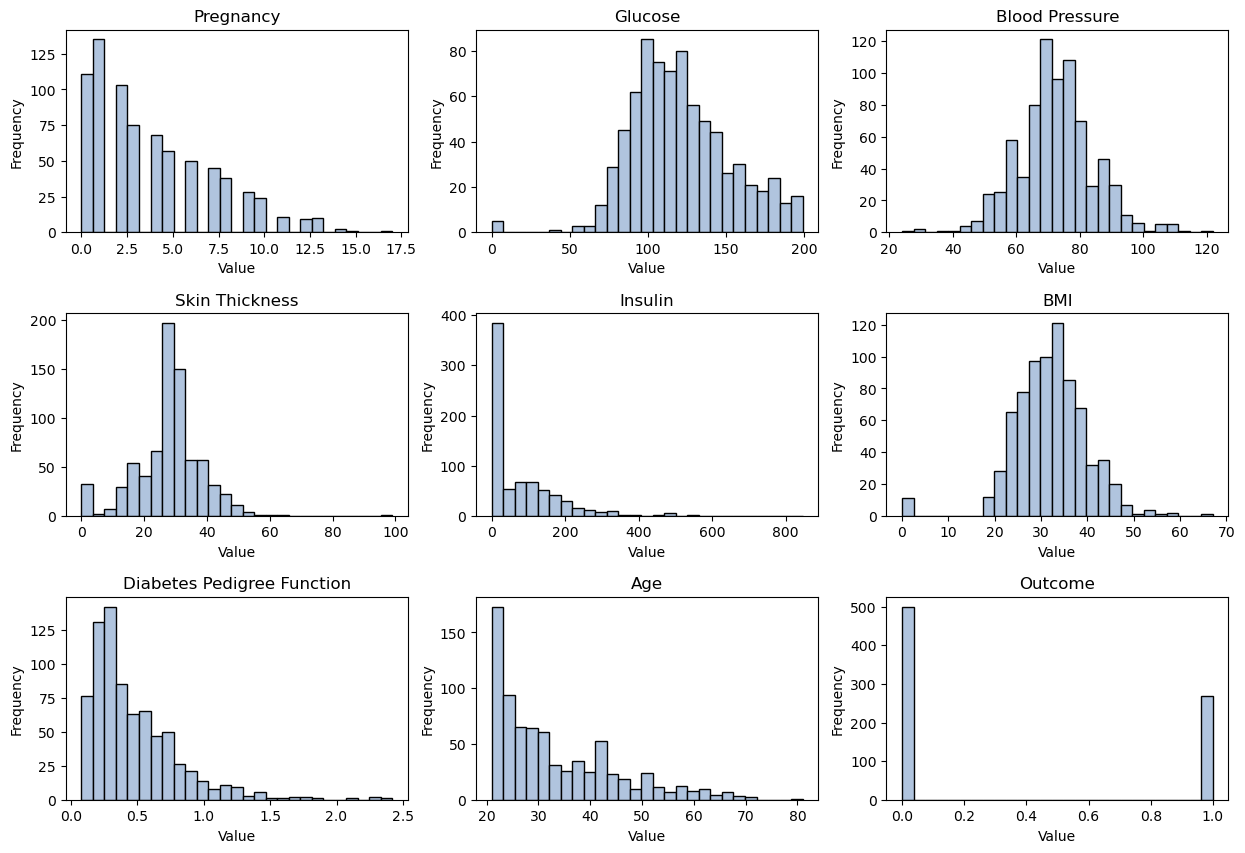

In [502]:
# Create dataset's histograms
plt.figure(figsize=(15, 10))

for i in range(len(plot_title)):
    plt.subplot(3, 3, i+1)  
    plt.subplots_adjust(hspace=0.4)
    plt.hist(df[data_columns[i]], bins=bin_width, color='lightsteelblue', edgecolor='k')
    plt.title(plot_title[i])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.show()

The majority of data are skewed to the right

## Feature Selection

In [503]:
#Dividing dataset into two
df_outcomeTrue = df[df["Outcome"] == 1]
df_outcomeFalse = df[df["Outcome"] == 0]

In [504]:
#Summary Statistics of All Data
sum_stat_all = pd.DataFrame(df.describe())
sum_stat_outcomeTrue = pd.DataFrame(df_outcomeTrue.describe())
sum_stat_outcomeFalse = pd.DataFrame(df_outcomeFalse.describe())

#Means
mean_all = list(sum_stat_all.loc["mean"])
mean_outcomeTrue = list(sum_stat_outcomeTrue.loc["mean"])
mean_outcomeFalse = list(sum_stat_outcomeFalse.loc["mean"])


#Means of all Features
means = pd.DataFrame((mean_all, mean_outcomeTrue, mean_outcomeFalse, (np.array(mean_outcomeTrue)/np.array(mean_outcomeFalse))))
means.columns = columns
means = means.set_index(pd.Index(["All", "Outcome1", "Outcome0", "Outcome1:Outcome0"]))
means

/var/folders/x6/m1pn8n_x0_77zgh2x7003htc0000gn/T/ipykernel_33902/3460612496.py:13: RuntimeWarning: divide by zero encountered in true_divide
  means = pd.DataFrame((mean_all, mean_outcomeTrue, mean_outcomeFalse, (np.array(mean_outcomeTrue)/np.array(mean_outcomeFalse))))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
All,3.845052,120.894531,72.428117,27.489142,79.799479,31.992578,0.471876,33.240885,0.348958
Outcome1,4.865672,141.257463,75.321371,30.415862,100.335821,35.142537,0.550500,37.067164,1.000000
Outcome0,3.298000,109.980000,70.877333,25.920421,68.792000,30.304200,0.429734,31.190000,0.000000
Outcome1:Outcome0,1.475340,1.284392,1.062700,1.173432,1.458539,1.159659,1.281025,1.188431,inf


Based on the Outcome1 to Outcome0 ratio, the features which have means that significantly differs are the following:


    Significant (Outcome1:Outcome0 mean ratio > 20%) 
    - Pregnancies
    - Glucose
    - Insulin
    - Diabetes Pedigree Function
    
    
    Somewhat significant (Outcome1:Outcome0 mean ratio > 10%) 
    - Skin Thickness
    - BMI
    - Age

In [505]:
df_backup = df.copy()

In [685]:
df = df_backup.copy()

### Selecting all Significant Features Only

In [685]:
df = df_backup.copy()

In [649]:
columns_todrop = ["BloodPressure", "SkinThickness", "BMI"]

In [650]:
df.drop(columns=columns_todrop, inplace=True)

In [651]:
df.head()

,Pregnancies,Glucose,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,0.627,50,1
1,1,85,0,0.351,31,0
2,8,183,0,0.672,32,1
3,1,89,94,0.167,21,0
4,0,137,168,2.288,33,1


### Selecting Significant and Somewhat Significant Features

In [685]:
df = df_backup.copy()

In [686]:
columns_todrop = ["BloodPressure"]

In [687]:
df.drop(columns=columns_todrop, inplace=True)

In [688]:
df.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,35.00000,0,33.6,0.627,50,1
1,1,85,29.00000,0,26.6,0.351,31,0
2,8,183,30.29385,0,23.3,0.672,32,1
3,1,89,23.00000,94,28.1,0.167,21,0
4,0,137,35.00000,168,43.1,2.288,33,1


There are two groups in which features can be selected. The first one are the features who have an Outcome1:Outcome0 mean ratio that is greater than 20% and the second group are those features who have an Outcome1:Outcome0 mean ratio that is greater than 10%.

## Scaling the Data

### Min-Max Scaler
Min-Max Sxaler seems to work best with Logistic Regression Models

In [689]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [690]:
minmax_scaler = MinMaxScaler()
minmax_data = minmax_scaler.fit_transform(df)

## Train and Test Sets

In [691]:
# !pip install imbalanced-learn

In [692]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [693]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

In [694]:
X = df[["Pregnancies", "Glucose", "Insulin", "DiabetesPedigreeFunction", "Age"]]
y = df["Outcome"]

In [695]:
# X = df[["Pregnancies", "Glucose", "Insulin", "DiabetesPedigreeFunction", "Age", "SkinThickness", "BMI"]]
# y = df["Outcome"]

In [696]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

#### Libraries for handling imbalance dataset

In [697]:
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

## Model 1: Logistic Regression as Benchmark

In [698]:
from sklearn.linear_model import LogisticRegression

In [699]:
smote = SMOTE(sampling_strategy=1.0) #Only 1.0 works
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [700]:
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)

In [701]:
model = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight={0: 0.7655860349127181, 1: 1.4413145539906103})

In [702]:
y_pred = model.predict(X_test)

#### Features with Outcome1:Outcome0 mean ratio of > 20%

In [666]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6623376623376623
Confusion Matrix:
[[51 48]
 [ 4 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.52      0.66        99
           1       0.52      0.93      0.66        55

    accuracy                           0.66       154
   macro avg       0.72      0.72      0.66       154
weighted avg       0.78      0.66      0.66       154



#### Features with Outcome1:Outcome0 mean ratio of > 10%

In [703]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6753246753246753
Confusion Matrix:
[[53 46]
 [ 4 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.54      0.68        99
           1       0.53      0.93      0.67        55

    accuracy                           0.68       154
   macro avg       0.73      0.73      0.68       154
weighted avg       0.79      0.68      0.68       154



## Model 2: Random Forest Classifier

In [704]:
from sklearn.ensemble import RandomForestClassifier

In [705]:
smote = SMOTE(sampling_strategy=1) #Only 1.0 works
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [706]:
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)

In [707]:
model = RandomForestClassifier(class_weight={0: class_weights[0], 1: class_weights[1]})

In [708]:
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight={0: 0.7655860349127181,
                                     1: 1.4413145539906103})

#### Features with Outcome1:Outcome0 mean ratio of > 20%

In [672]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7272727272727273
Confusion Matrix:
[[70 29]
 [13 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        99
           1       0.59      0.76      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75      0.73      0.73       154



#### Features with Outcome1:Outcome0 mean ratio of > 10%

In [709]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7337662337662337
Confusion Matrix:
[[74 25]
 [16 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.61      0.71      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



## Model 3: Decision Tree Classifier

In [710]:
from sklearn.tree import DecisionTreeClassifier

In [711]:
smote = SMOTE(sampling_strategy=1)  # Only 1.0 Works
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [712]:
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)

In [713]:
model = DecisionTreeClassifier(class_weight={0: class_weights[0], 1: class_weights[1]})
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(class_weight={0: 0.7655860349127181,
                                     1: 1.4413145539906103})

In [714]:
y_pred = model.predict(X_test)

#### Features with Outcome1:Outcome0 mean ratio of > 20%

In [678]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6428571428571429
Confusion Matrix:
[[66 33]
 [22 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71        99
           1       0.50      0.60      0.55        55

    accuracy                           0.64       154
   macro avg       0.62      0.63      0.63       154
weighted avg       0.66      0.64      0.65       154



#### Features with Outcome1:Outcome0 mean ratio of > 10%

In [715]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6363636363636364
Confusion Matrix:
[[65 34]
 [22 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70        99
           1       0.49      0.60      0.54        55

    accuracy                           0.64       154
   macro avg       0.62      0.63      0.62       154
weighted avg       0.66      0.64      0.64       154



## Model 4: Support Vector Machine

In [716]:
from sklearn.svm import SVC

In [717]:
smote = SMOTE(sampling_strategy=1.0)  # Only 1.0 works
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [718]:
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)

In [719]:
model = SVC(class_weight={0: class_weights[0], 1: class_weights[1]})
model.fit(X_train_resampled, y_train_resampled)

SVC(class_weight={0: 0.7655860349127181, 1: 1.4413145539906103})

In [720]:
y_pred = model.predict(X_test)

#### Features with Outcome1:Outcome0 mean ratio of > 20%

In [684]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6233766233766234
Confusion Matrix:
[[46 53]
 [ 5 50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.46      0.61        99
           1       0.49      0.91      0.63        55

    accuracy                           0.62       154
   macro avg       0.69      0.69      0.62       154
weighted avg       0.75      0.62      0.62       154



#### Features with Outcome1:Outcome0 mean ratio of > 10%

In [721]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6168831168831169
Confusion Matrix:
[[45 54]
 [ 5 50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.45      0.60        99
           1       0.48      0.91      0.63        55

    accuracy                           0.62       154
   macro avg       0.69      0.68      0.62       154
weighted avg       0.75      0.62      0.61       154



## Model Metrics

In [727]:
accuracy = [0.6623, 0.6753, 0.7272, 0.7337, 0.6428, 0.6363, 0.6233, 0.6168]
precision = [0.52, 0.53, 0.59, 0.61, 0.50, 0.49, 0.49, 0.48]
recall = [0.93, 0.93, 0.76, 0.71, 0.60, 0.60, 0.91, 0.91]
f1score = [0.67, 0.66, 0.67, 0.66, 0.55, 0.54, 0.63, 0.63]
modelname = ["LR1", "LR2", "RF1", "RF2", "DT1", "DT2", "SVM1", "SVM2"]

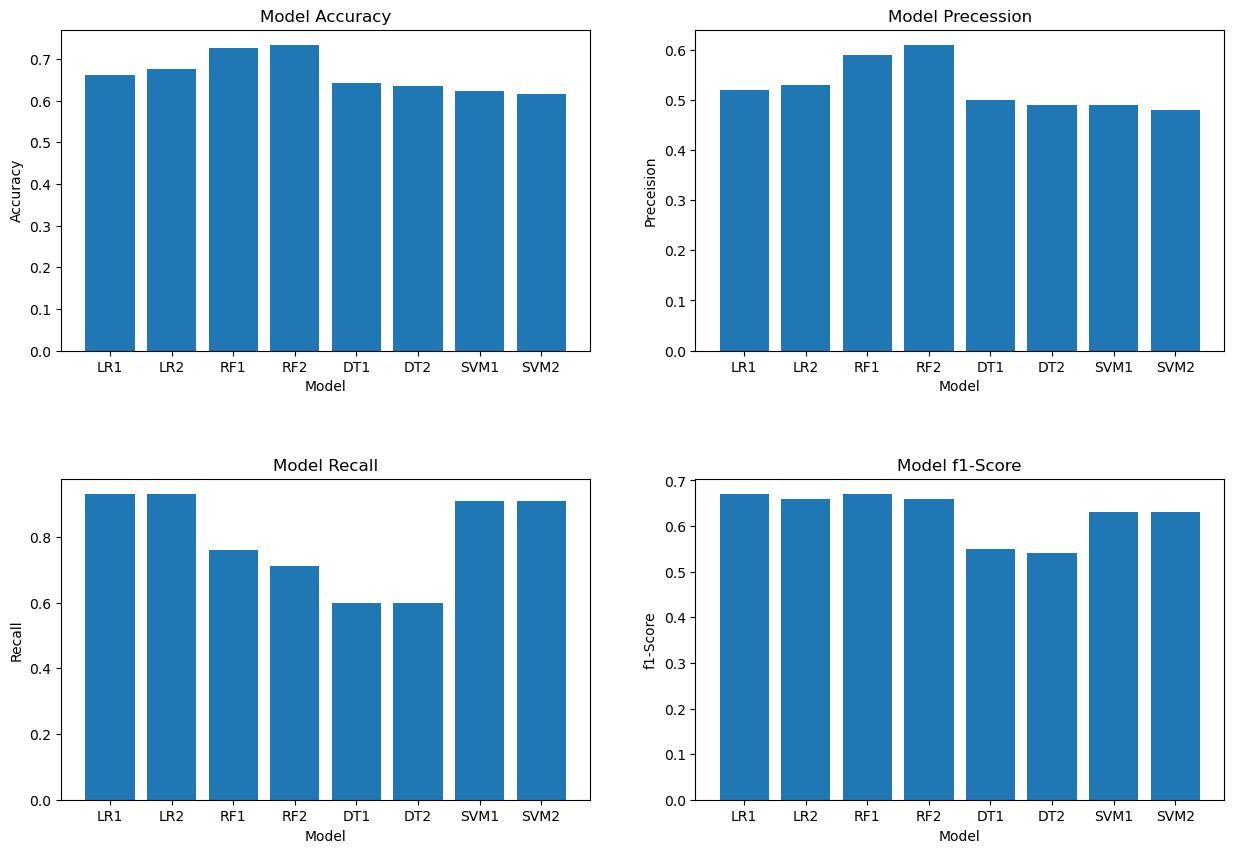

In [735]:
# Create dataset's histograms
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)  
plt.subplots_adjust(hspace=0.4)
plt.bar(modelname, accuracy)
plt.title("Model Accuracy")
plt.xlabel('Model')
plt.ylabel('Accuracy')


plt.subplot(2, 2, 2)  
plt.subplots_adjust(hspace=0.4)
plt.bar(modelname, precision)
plt.title("Model Precession")
plt.xlabel('Model')
plt.ylabel('Preceision')

plt.subplot(2, 2, 3)  
plt.subplots_adjust(hspace=0.4)
plt.bar(modelname, recall)
plt.title("Model Recall")
plt.xlabel('Model')
plt.ylabel('Recall')

plt.subplot(2, 2, 4)  
plt.subplots_adjust(hspace=0.4)
plt.bar(modelname, f1score)
plt.title("Model f1-Score")
plt.xlabel('Model')
plt.ylabel('f1-Score')


plt.show()

The Random Forest models did well in terms of overall accuracy, precision and f1-score. However, it significantly lagged behind the other models when it comes to recall.

The Logistic Regression models did very well in terms of recall metrics and f1-score but it is the second best model in terms of precision and accuracy.

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. Shape of the Data
    - Based on the histogram in Part I, the data in this data set are mostly skewed to the right except for Blood Pressure, BMI and Glucose. Which are expected for this features as it these are vitals and body measures that usually lies in the centre of the range.
    - However, when the dataset is divided into two, one with Outcome = 1 and one with Outcome = 0, the sape of Glucose and Blood Pressure have become slightly skewed to the left. This means that those who have Outcome = 1 are generally on the higher range of Glucose level range and Blood Pressure Rate. Which is not true to the dataset where Outcome = 0.
    
    
2. Feature Means / Feature Selection
    - In general, the mean of all features are higher in the instances who's Outcome = 1.
    - The mean Pregnancies, Insulin, Glucose and the Diabetes Pedigree Function are significantly higher in the instances who's Outcome = 1.


3. Handling Imbalanced Data Set
    - In part 1, the ratio of of dataset where Outcome = 1 is 1:3 to the instances where Outcome = 0. To handle this, SMOTE and Class Weights are used.
    
    
4. Model Performance
    - For medical diagnostics, it is ideal for a model to have a higher score in predicting who have the disease with some false positives than a higher score in predicting who does not have a disease with some false negatives. Therefore, Recall can be used as a metric in evaluating the four ML models.
    - Based on the visualization in the metrics, Logistic Regression from either of the dataset groups did well in predicting the outcome of this dataset.